In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys, os
sys.path.append(os.path.abspath('../../lib'))

In [3]:
import numpy as np
import nengo
import matplotlib.pyplot as plt

In [4]:
from two_comp_sim_2d_fun_network import *

In [ ]:
rng = np.random.RandomState(77891)
#f = lambda x, y: 0.5 * (x + y)
f = lambda x, y: (0.5 * (x + 1) * (y + 1)) - 1.0
res = run_single_spiking_trial(
    "gc50_no_noise",
    f=f,
    intermediate=False,
    decoder_reg=1e-2,
    reg=0.01, rng=rng,
    tau_pre_filt=0.001,
    mask_negative=True)

print(res["errors"])

Generating population tuning curves and training data...
Computing target connection weights...
Found libbioneuronqp.so at /home/andreas/source/libbioneuronqp/build/libbioneuronqp.so
WARN: Error while computing weights for post-neuron 0. Maximum number of iterations reached.
WARN: Error while computing weights for post-neuron 8. Maximum number of iterations reached.
WARN: Error while computing weights for post-neuron 12. Maximum number of iterations reached.
WARN: Error while computing weights for post-neuron 5. Maximum number of iterations reached.
WARN: Error while computing weights for post-neuron 25. Maximum number of iterations reached.
WARN: Error while computing weights for post-neuron 17. Maximum number of iterations reached.
WARN: Error while computing weights for post-neuron 30. Maximum number of iterations reached.
WARN: Error while computing weights for post-neuron 34. Maximum number of iterations reached.
WARN: Error while computing weights for post-neuron 47. Maximum numb

In [12]:
def flt(xs, tau=10e-3, dt=1e-4):
    return nengo.synapses.Lowpass(tau).filt(xs, dt=dt)

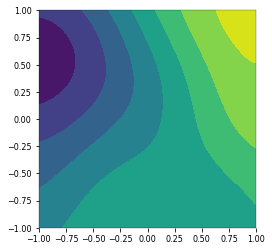

In [6]:
f = lambda x, y: x + y
samples, ys, xs = generate_training_data_random_fun(0.8)

fig, ax = plt.subplots()    
ax.contourf(xs, xs, ys.reshape(xs.size, -1))
ax.set_aspect(1)

In [7]:
model = NEURON_MODELS["linear"]
p = {
    "α": 1.0,
    "β": 0.0,
}
res = generate_tuning_curves(neuron_model=model, rng=np.random.RandomState(3421))

(-1.0, 1.0)

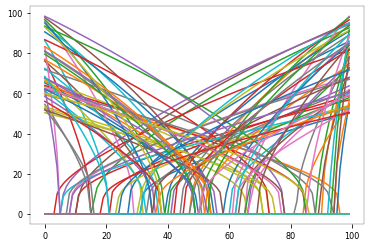

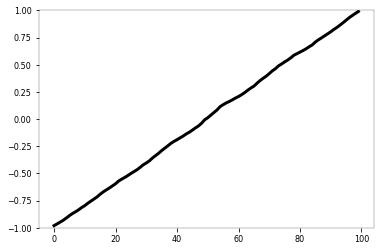

In [8]:
As = res["A"](np.linspace(-1, 1, 100).reshape(-1, 1))

fig, ax = plt.subplots()
ax.plot(As);

fig, ax = plt.subplots()
ax.plot(As @ res["D"], 'k-', linewidth=3)
ax.set_ylim(-1, 1)

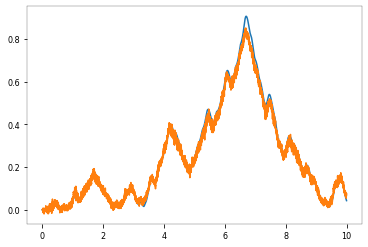

In [13]:
fig, ax = plt.subplots()
ax.plot(res["ts"], res["tar_filt"])
ax.plot(res["ts"], res["tar_dec_filt"])

TypeError: 'NoneType' object is not subscriptable

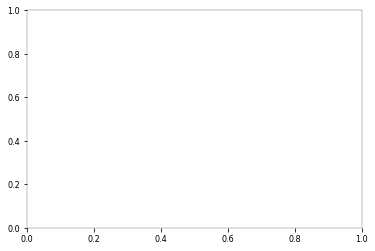

In [11]:
fig, ax = plt.subplots()
ax.plot(res["ts"], flt(res["Oint"] @ res["Pint"]["D"]))
ax.plot(res["ts"], flt(res["xs"]), 'w--')
ax.plot(res["ts"], flt(res["ys"]), 'w--')